In [1]:
# common
import sys
import os
import os.path as op

# basic
import numpy as np
import pandas as pd
import xarray as xr
from time import time
import warnings
warnings.simplefilter('ignore')

# append calval to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# custom
from calval import calval

# functions
from calval import functions

In [2]:
# initial time to see the duration of the notebook
t0 = time()

In [3]:
# data 
p_data = op.join(os.getcwd(), '..', 'data')

csiro      =  pd.read_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe_oahu.pkl'))
csiro_lon, csiro_lat = 202.0, 22.0 # add lon / lat coordinates of csiro node
satellite  =  xr.open_dataset(op.join(p_data, 'satellite', 'satellite_dataset_oahu.nc'))
buoy       =  xr.open_dataset(op.join(p_data, 'buoy', 'waimeabay_nearshore_buoy.nc'))

print('---------------------------------------------------')
print('Time wasted reading the data: ' + str(round(time()-t0, 2)) + ' s')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted reading the data: 0.09 s
---------------------------------------------------


In [4]:
t1 = time()


 Plotting region to be working with!! 



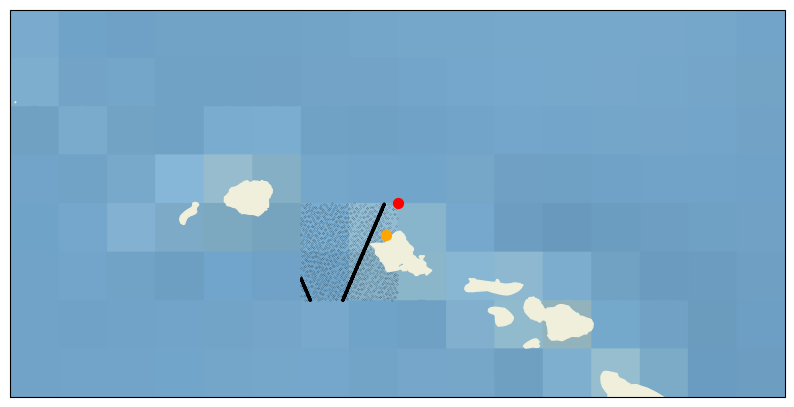

--------------------------------------------------------
SATELLITE CALIBRATION will be performed
-------------------------------------------------------- 
 
Satellite box values: 
South latitude: 21.7
North latitude: 22.3
West latitude: 201.7
East latitude: 202.3
 
 
Selecting the satellite data choosed... 
 
Satellite length: 1894
Hindcast information able to calibrate: 362304 
 
Choose the way to calibrate the data: 
True (not recomended): hindcast for each satellite 
False (empty box): satellite for each hindcast 
----- Select ----- : 
 
 
Performing the time calibration... 
 
Length of data to calibrate: 1128 
 
 
 
Constructing matrices and calibrating... 
 
This might take a few minutes... 

Sea... 

0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...


Swells 1, 2, 3... 

0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...
0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...
0.0% completed...
25.0% completed...


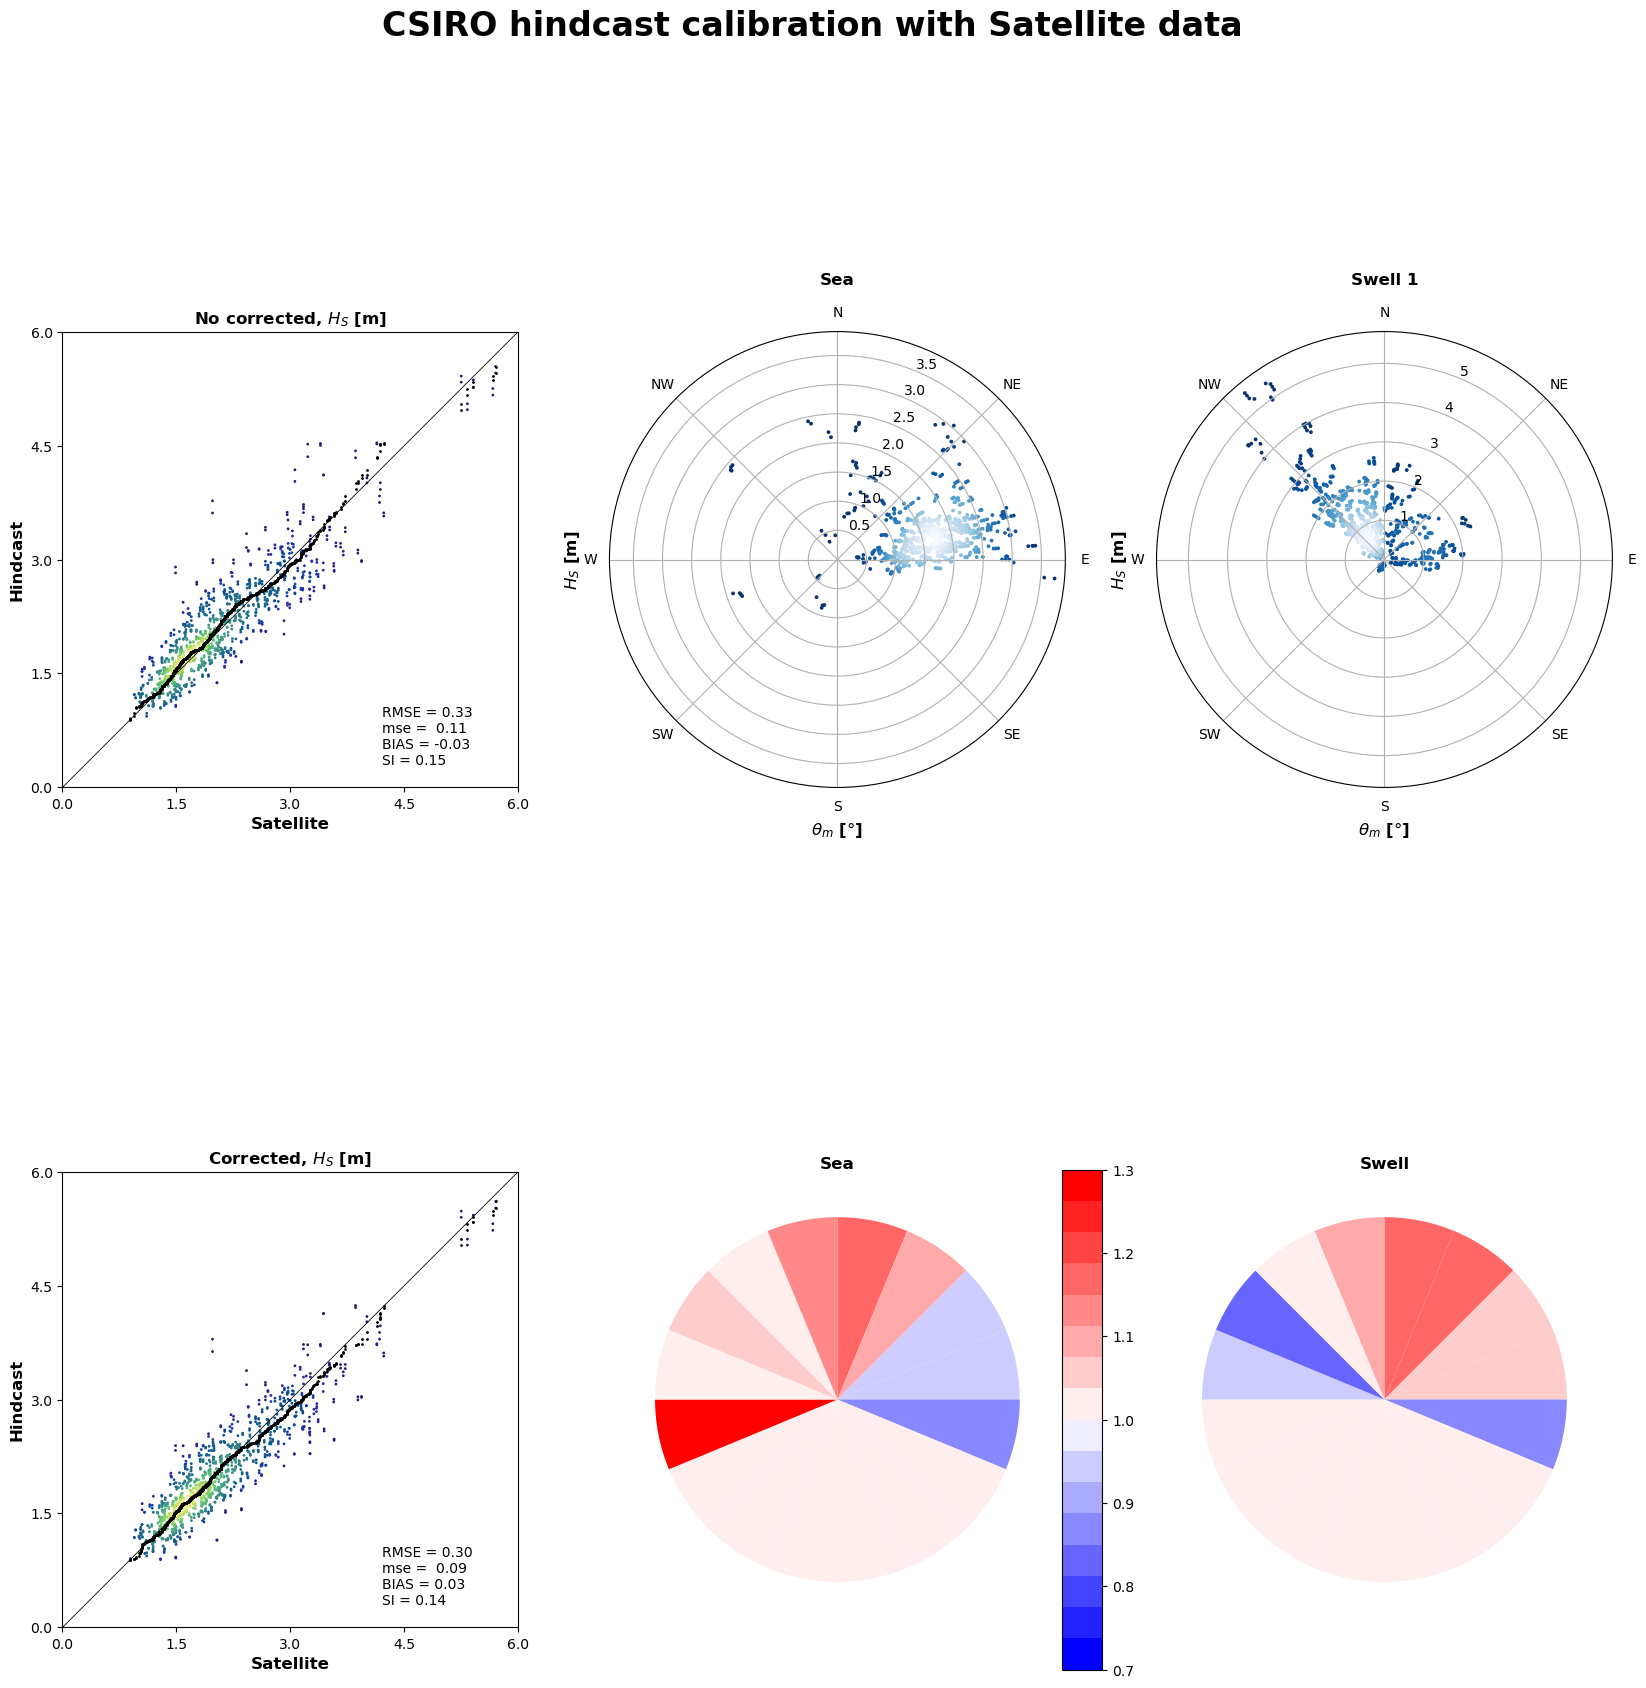

Saving corrected results... 
 
This might take more than a few minutes... 

Sea... 

0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...


Swells 1, 2, 3... 

0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...
0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...
0.0% completed...
25.0% completed...
50.0% completed...
75.0% completed...
 
  
 

 No buoy corrections will be done!! 

---------------------------------------------------
Time wasted initializing the constructor: 1.84 m
---------------------------------------------------


In [5]:
## creation of the main object

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Satellite box :    South = 21.8               ###
###                      North = 22.2               ###
###                      West  = 201.8              ###
###                      East  = 202.2              ###
###   Time calibration:  False                      ###
###   Threshold :        0.01                       ###
#######################################################

# the threshold allows us to delete not relevant information

calval_case = calval.CalVal(hindcast=csiro, 
                            hindcast_longitude=csiro_lon,
                            hindcast_latitude=csiro_lat,
                            satellite=satellite,
                            buoy=(True,buoy.to_dataframe().rename(
                                columns={
                                    'wave_height':'Hs_Buoy',
                                    'wave_peak_period':'Tp_Buoy',
                                    'wave_mean_direction_corr':'Dir_Buoy'
                                }
                            )), buoy_longitude=buoy.longitude,
                            buoy_latitude=buoy.latitude,
                            buoy_corrections=False)

# if buoy data does not exist, just delte the buoy and buoy_correction
# attributes, and then comment the methods that use the buoy information

print('---------------------------------------------------')
print('Time wasted initializing the constructor: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

In [6]:
t1 = time()

In [7]:
calval_case.hindcast_sat_corr.to_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe_oahu_sat_corr.pkl'))
# calval_case.hindcast_buoy_corr.to_pickle(op.join(p_data, 'hindcast', 'csiro_dataframe_oahu_buoy_corr.pkl'))

--------------------------------------------------------
RAW comparison will be performed
-------------------------------------------------------- 
 
Number of years: 2
Years separated by one space: 2005 2007
 
 
Comparing data... 
 


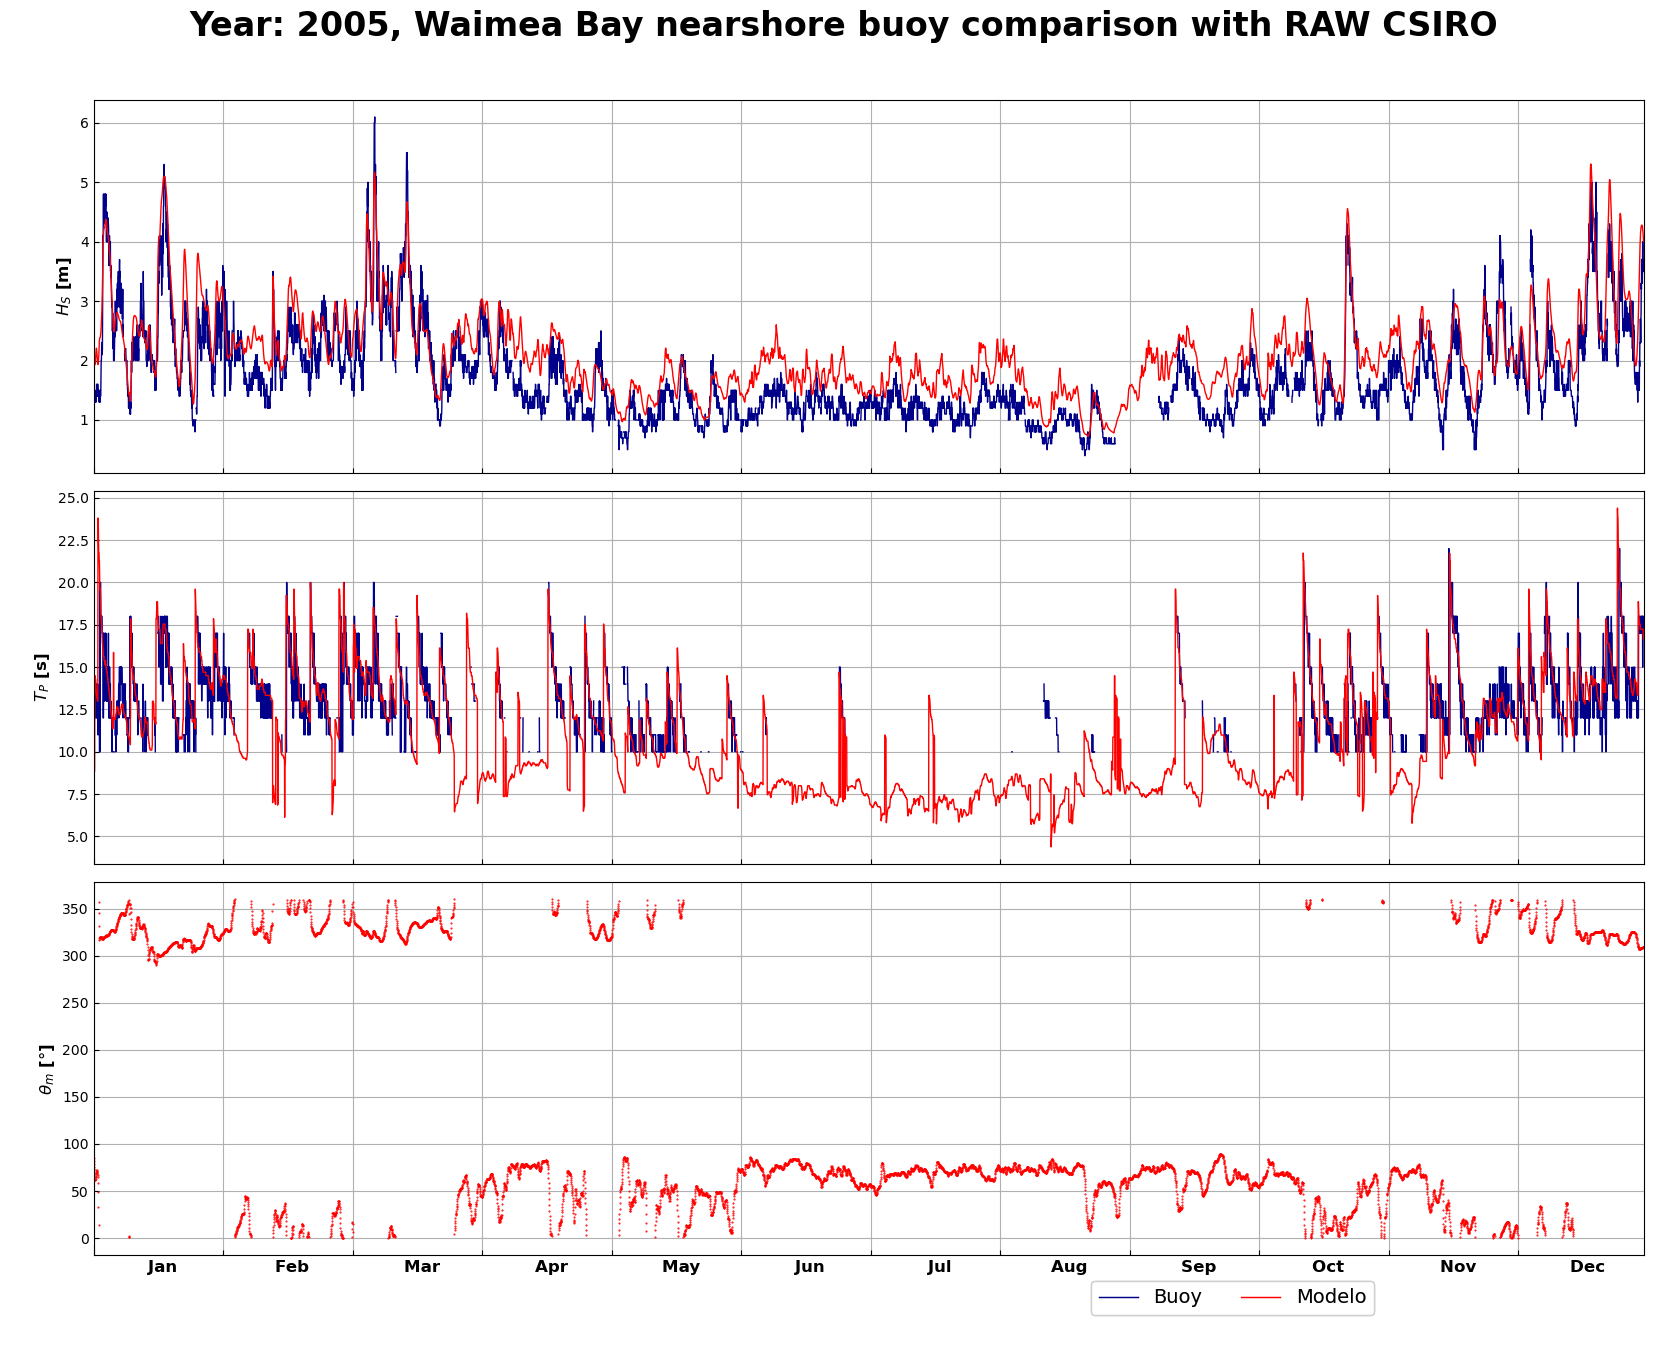

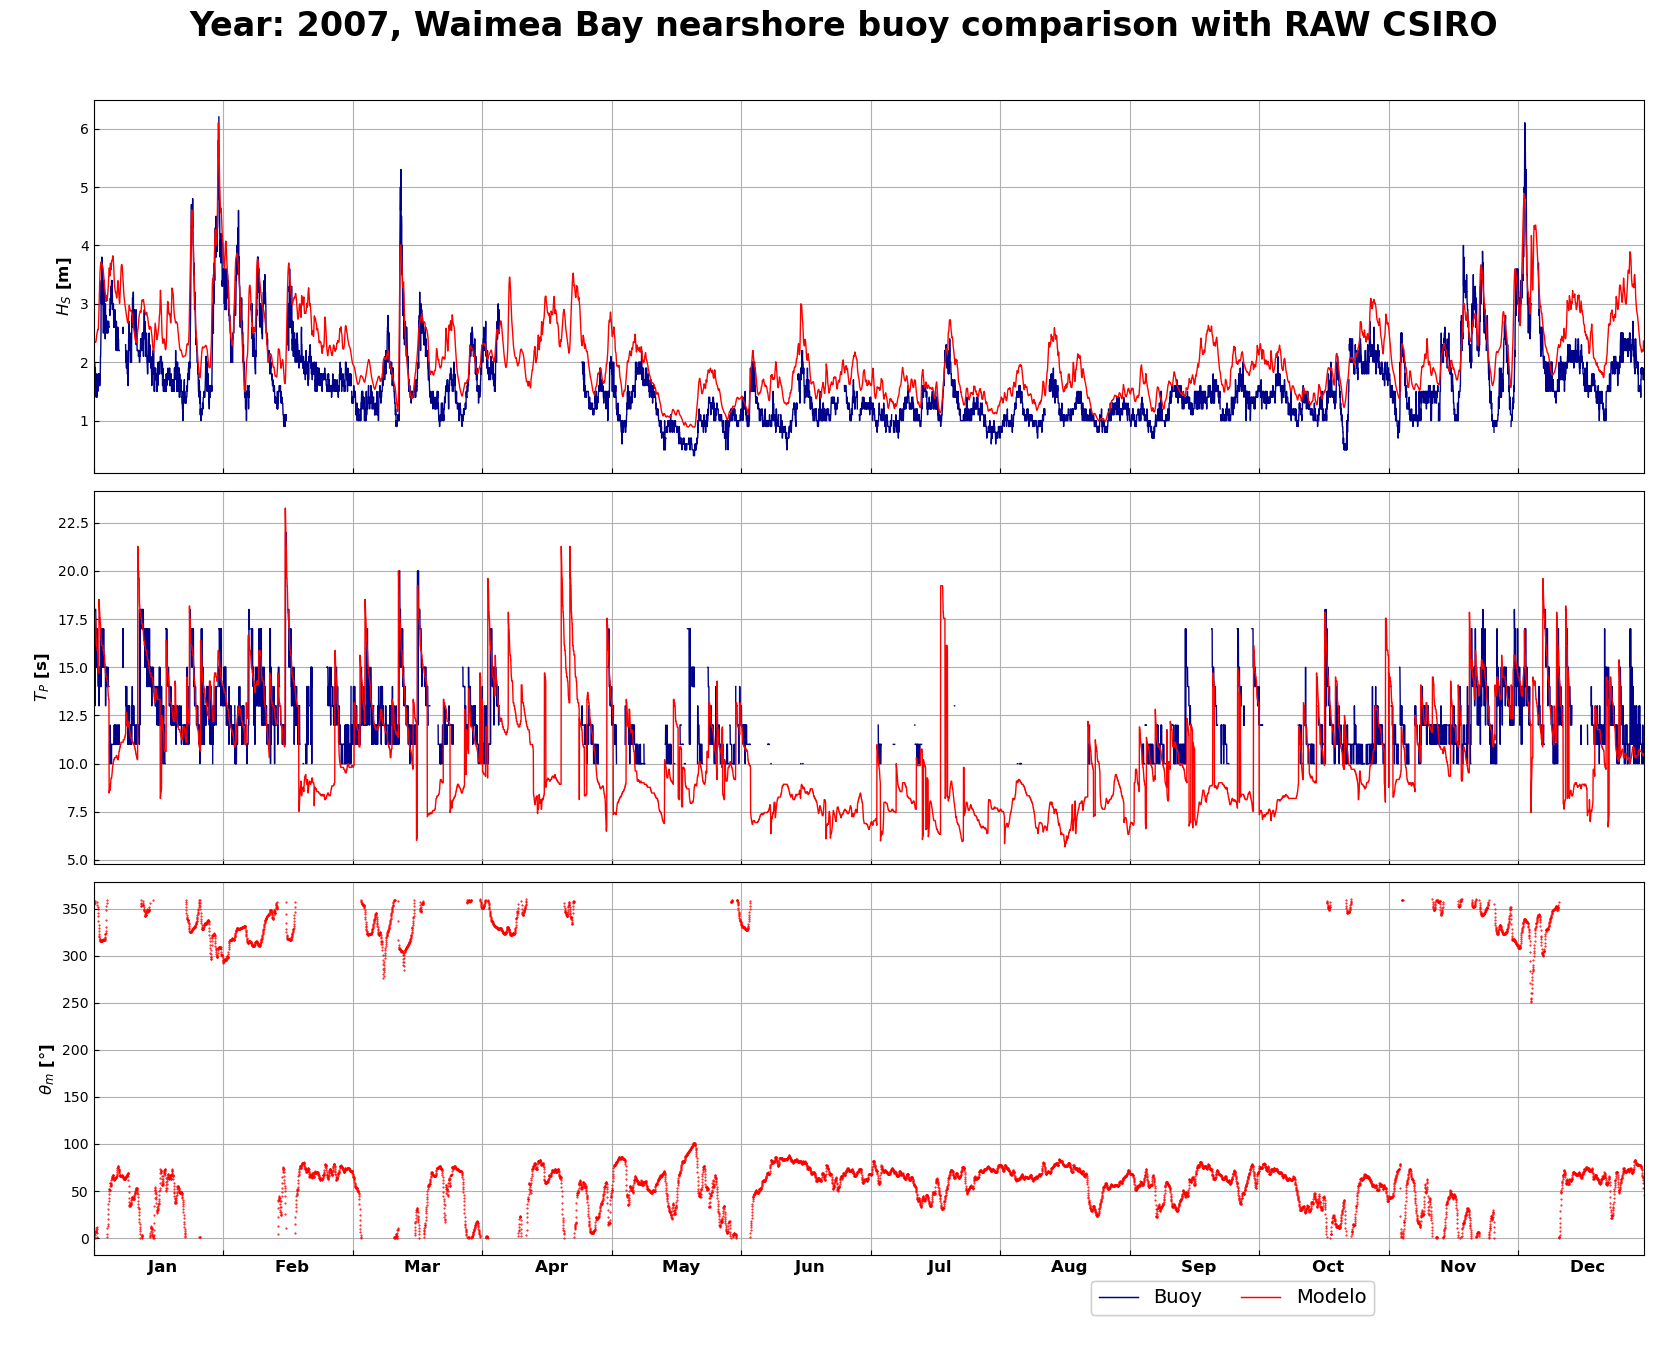

In [8]:
# comparisons

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Number of years :    2                        ###
###   Years :              2005 2007                ###
#######################################################

calval_case.buoy_comparison('raw')

--------------------------------------------------------
SAT_CORR comparison will be performed
-------------------------------------------------------- 
 
Number of years: 2
Years separated by one space: 2005 2007
 
 
Comparing data... 
 


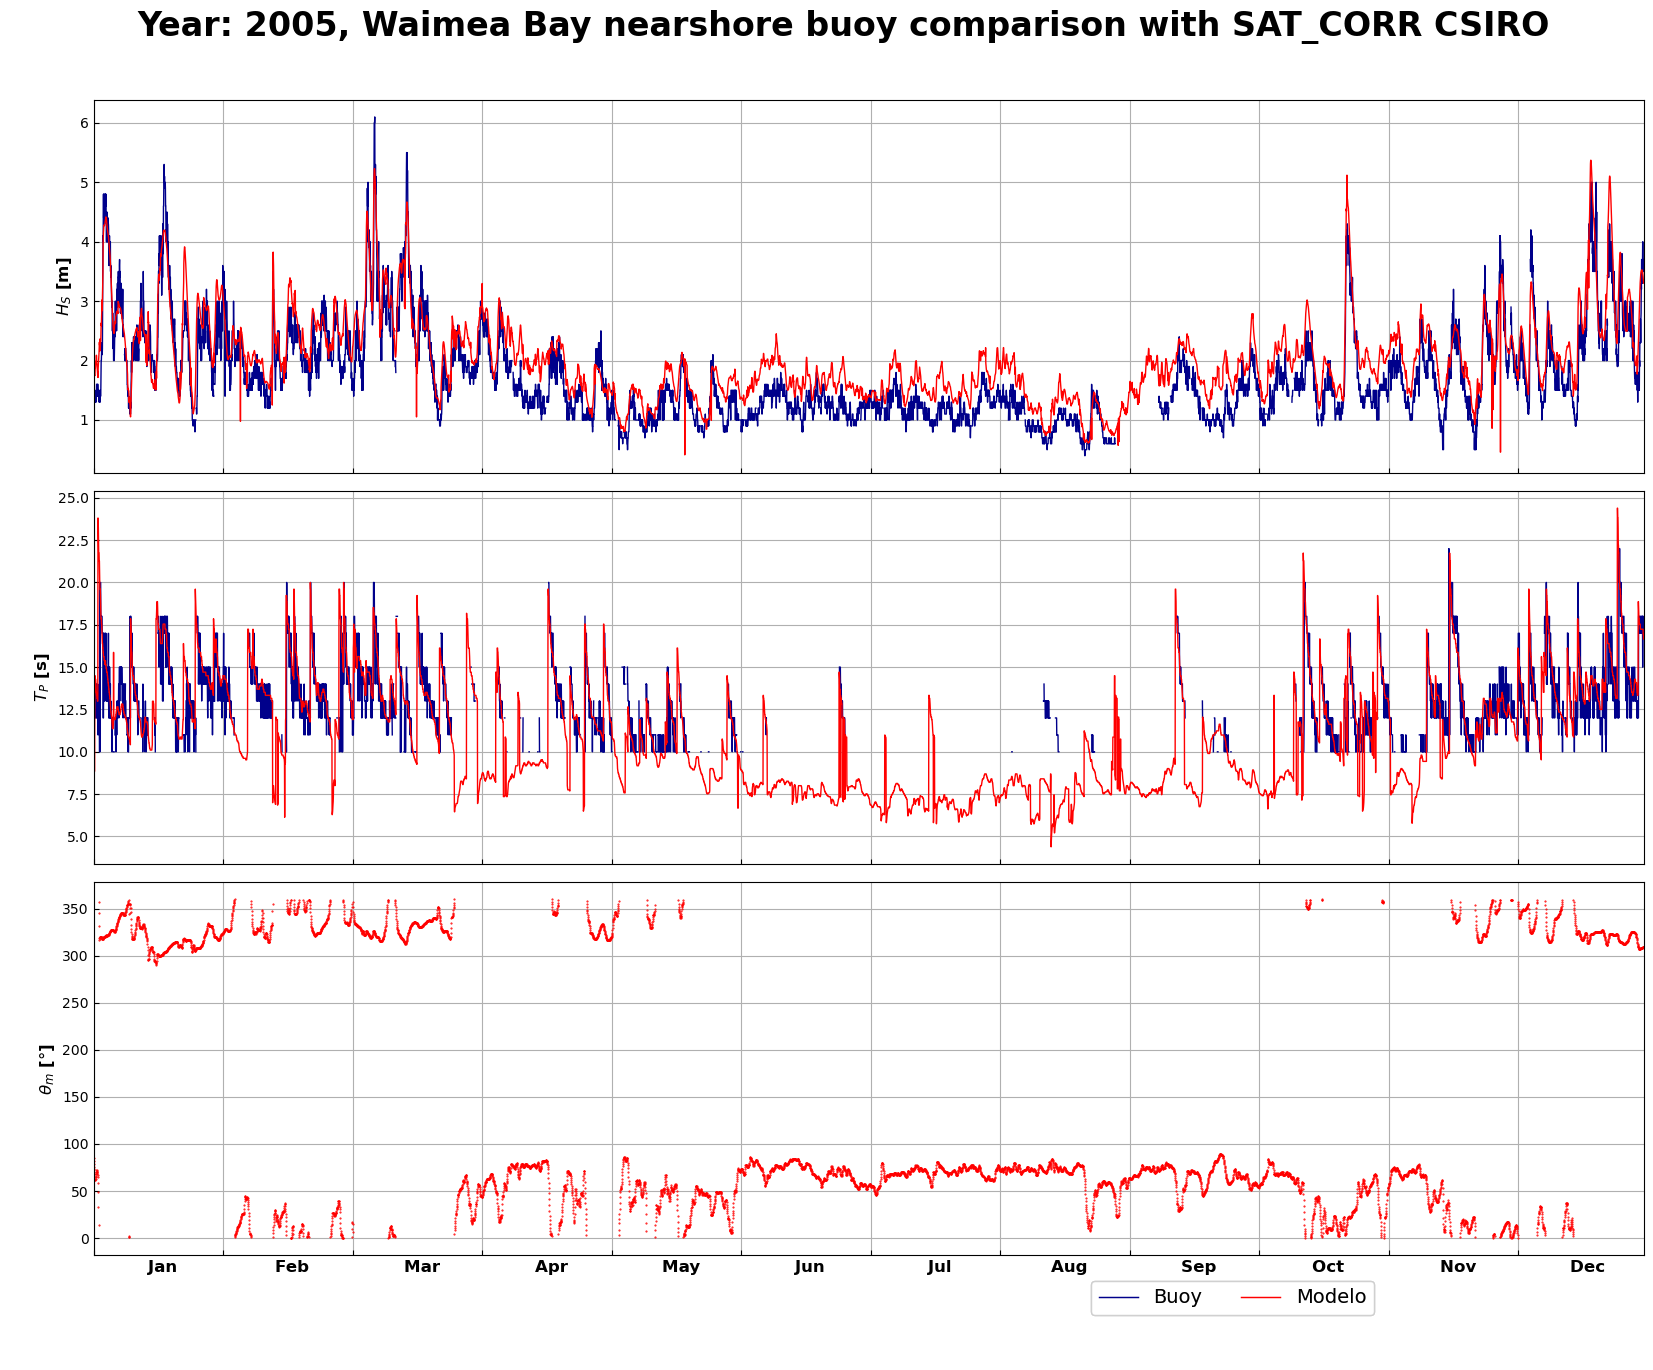

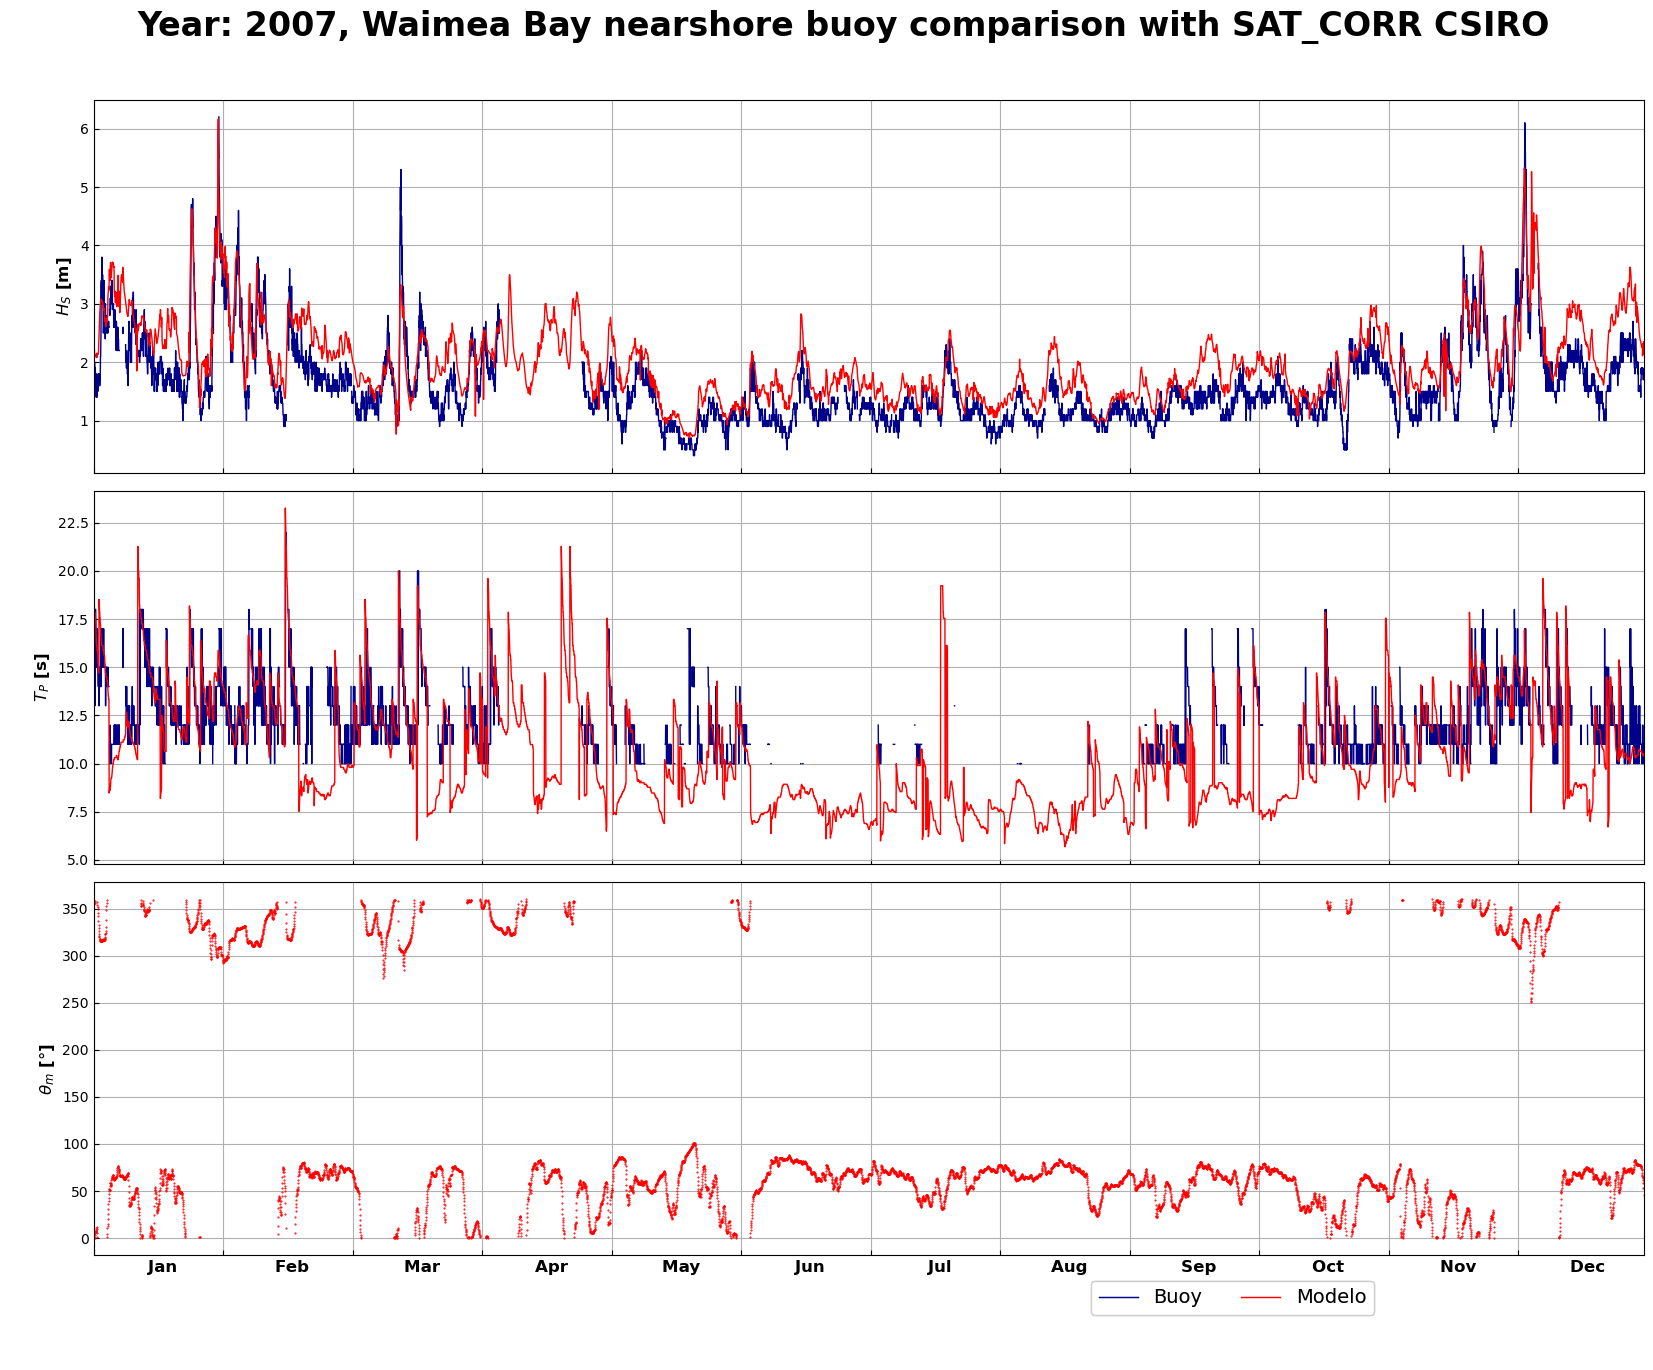

In [9]:
calval_case.buoy_comparison('sat_corr')

In [10]:
# calval_case.buoy_comparison('buoy_corr')

In [11]:
print('---------------------------------------------------')
print('Time wasted comparing: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted comparing: 0.24 m
---------------------------------------------------


In [12]:
t1 = time()

--------------------------------------------------------
RAW VALIDATION will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 1713 
 


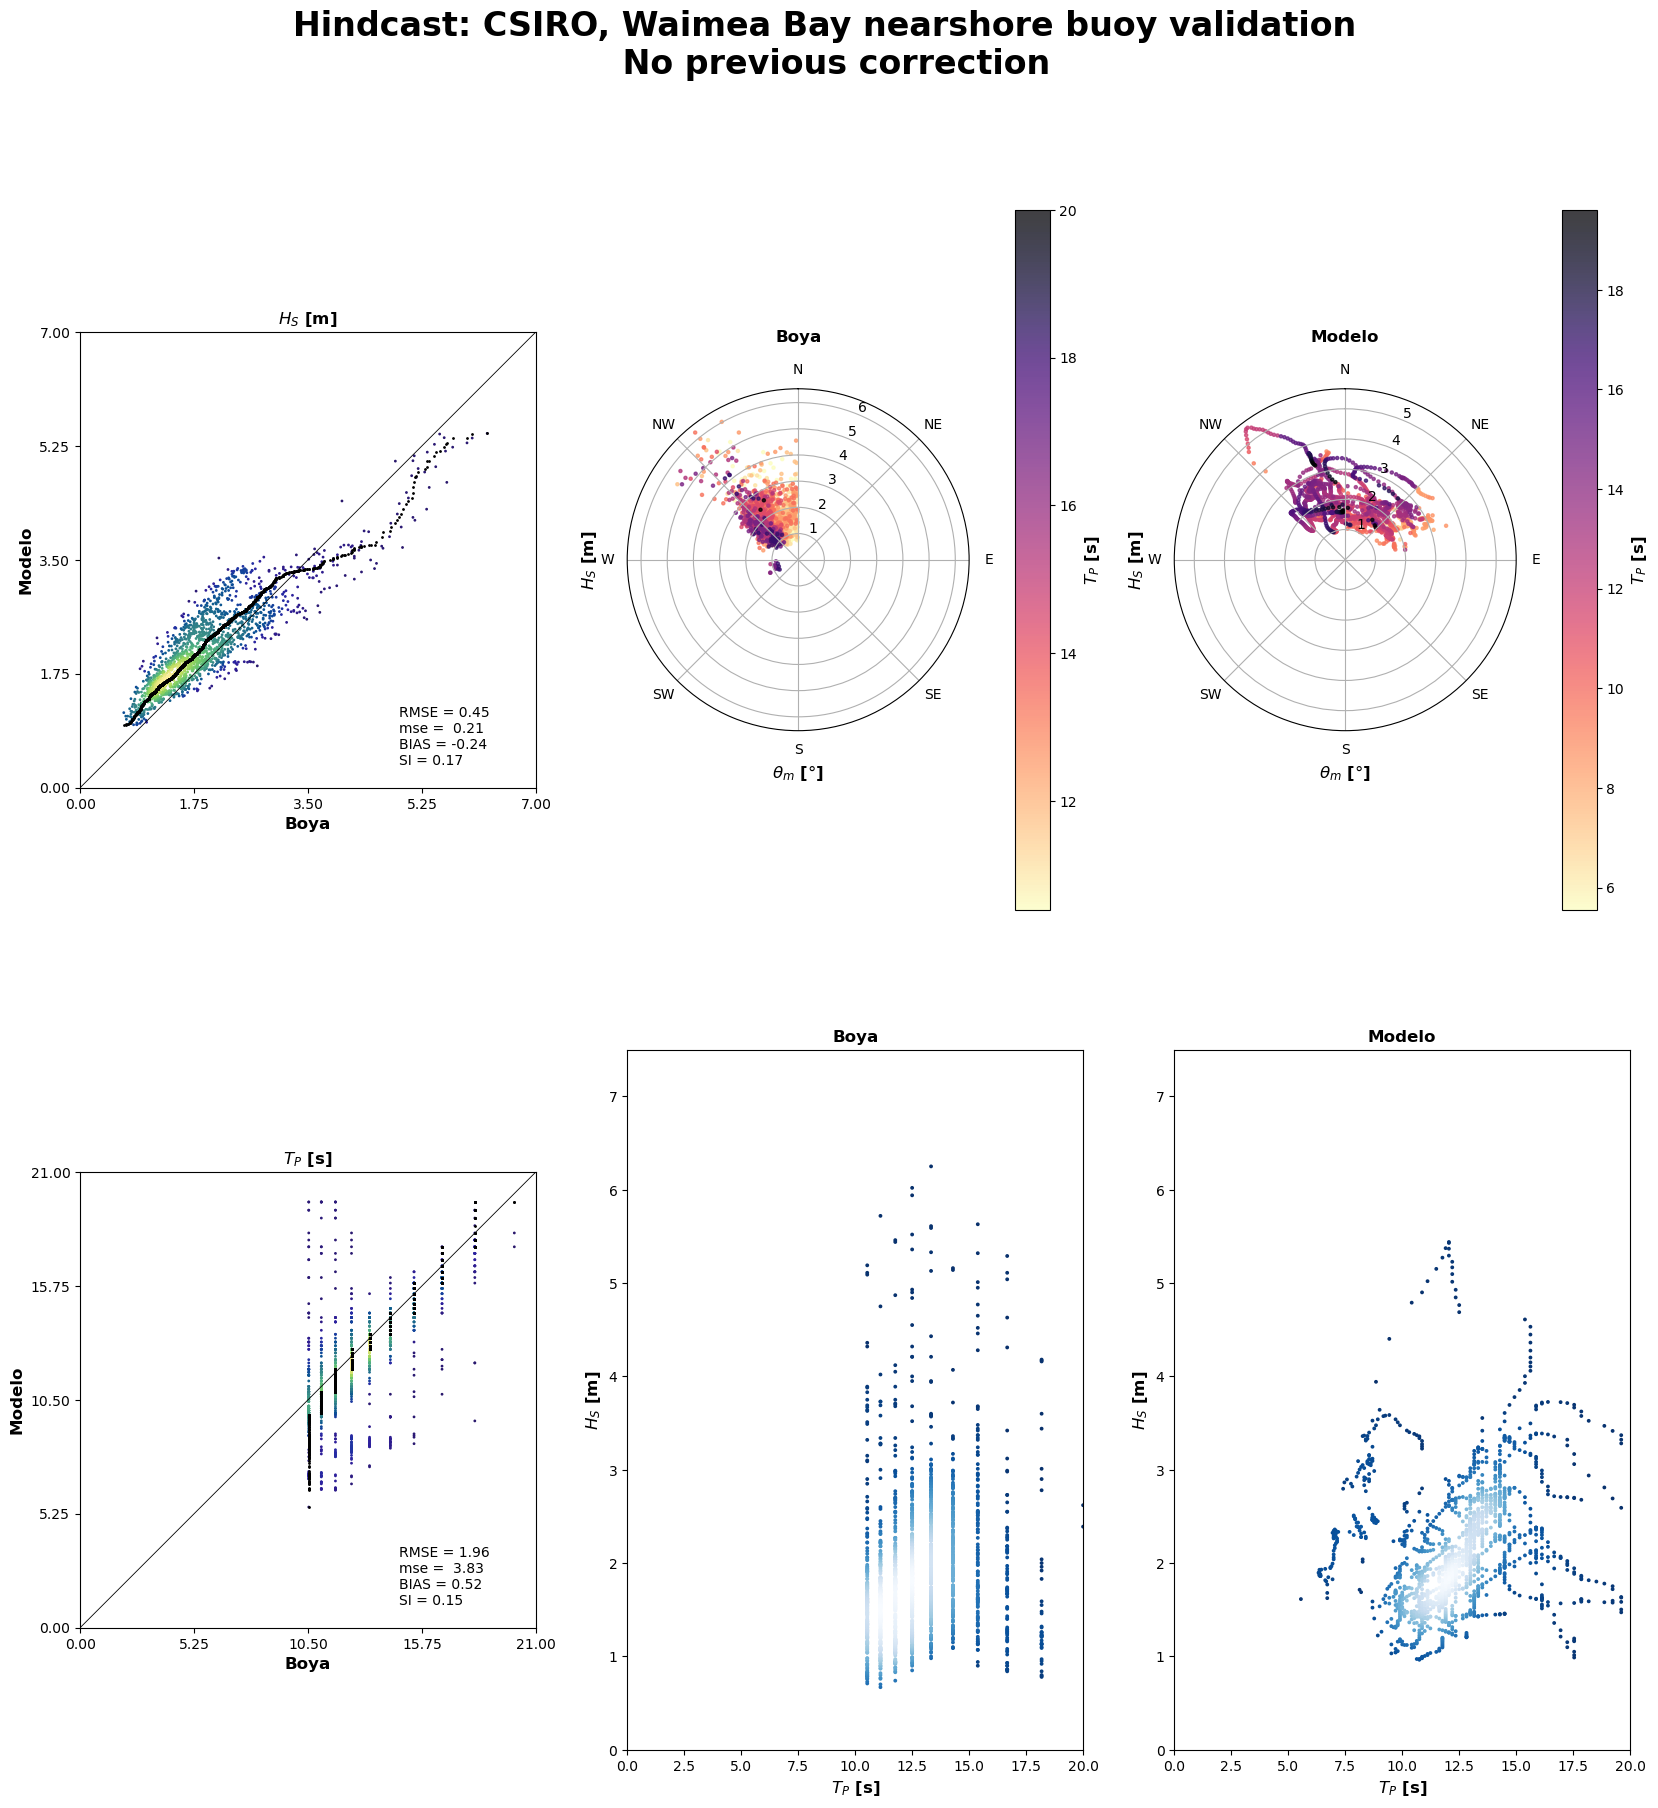

In [13]:
# validations

calval_case.buoy_validation('raw')

--------------------------------------------------------
SAT_CORR VALIDATION will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 1713 
 


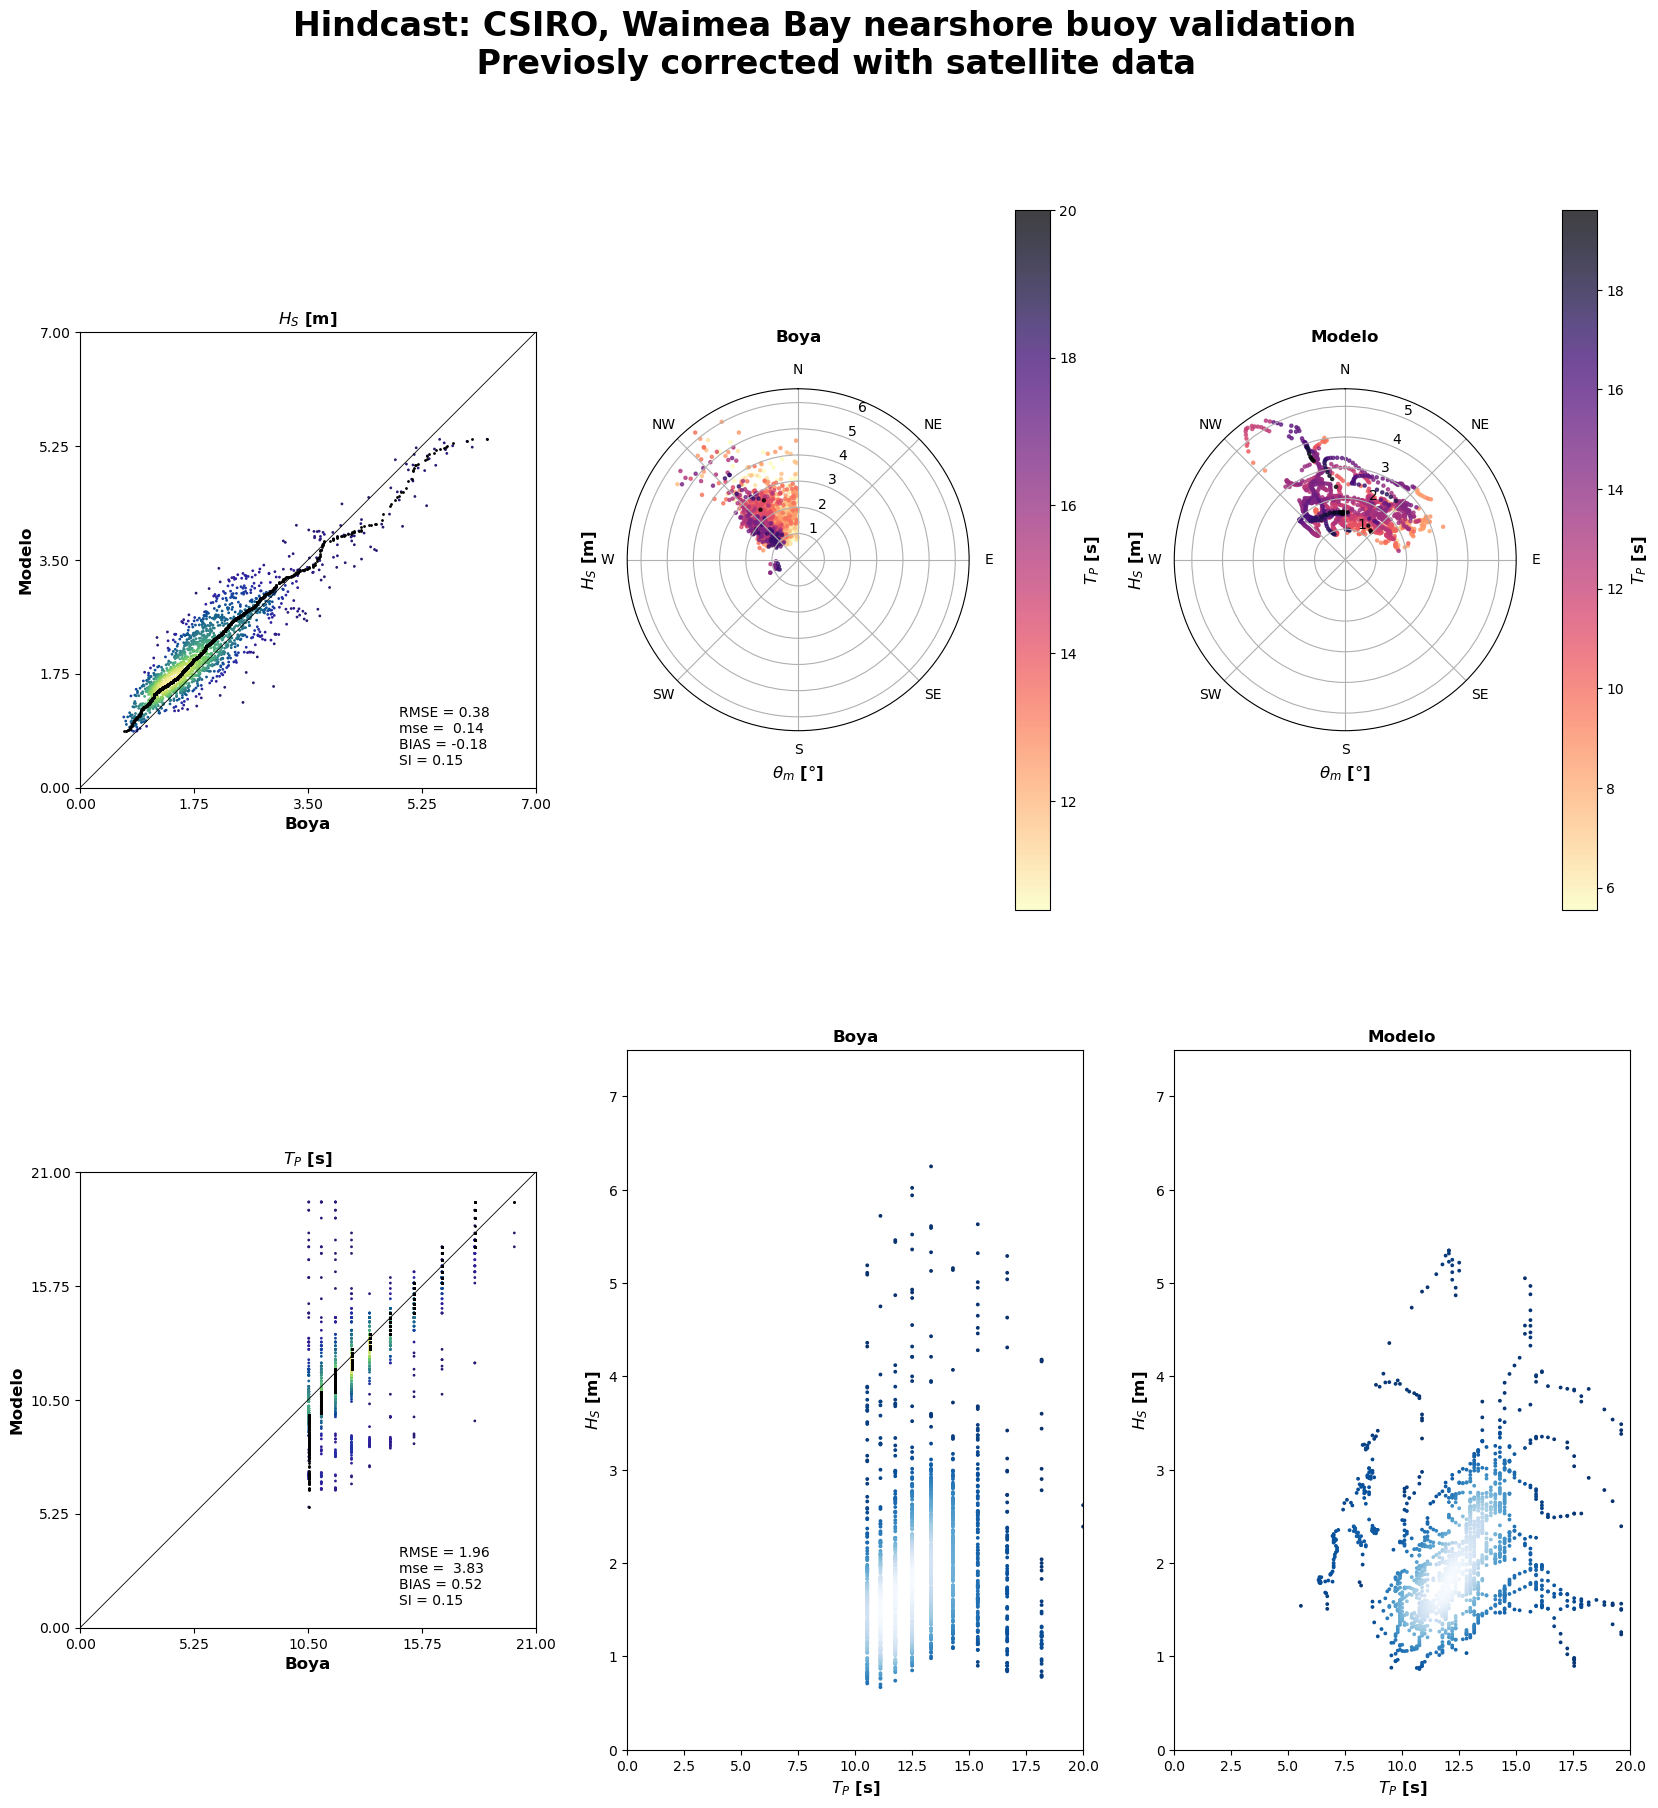

In [14]:
calval_case.buoy_validation('sat_corr')

In [15]:
# calval_case.buoy_validation('buoy_corr')

In [16]:
print('---------------------------------------------------')
print('Time wasted validating: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted validating: 0.05 m
---------------------------------------------------


In [17]:
print('---------------------------------------------------')
print('TOTAL time of the script: ' + str(round((time()-t0)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
TOTAL time of the script: 2.13 m
---------------------------------------------------
